<a href="https://colab.research.google.com/github/imkaranverma/2016BatchMajorProjects/blob/master/linear_regression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv('/content/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [ ]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,NaN,121428.348338,121641.979730,121906.914111,122475.146355,123129.113541,...,341524.686817,340331.965361,339460.290723,339398.680892,340364.871948,341993.734727,343935.026591,345686.216142,347311.245095,348538.961877
1,394913,1,"New York, NY",msa,NY,216218.985144,217137.793836,218065.112352,219944.218493,221890.097976,...,607957.914467,607138.375566,605781.039331,606096.535158,608105.120897,612136.785991,616308.017005,619911.494379,623211.984905,625939.720932
2,753899,2,"Los Angeles, CA",msa,CA,222303.044856,223130.294238,224232.182526,226424.570068,228822.354722,...,883096.482193,874754.169505,863791.280350,853971.725026,851581.705998,855385.245879,863224.274090,874493.271073,888127.785264,901894.488002
3,394463,3,"Chicago, IL",msa,IL,152289.701354,152430.677254,152699.168339,153367.107433,154170.557823,...,292513.670485,291906.868582,291753.784548,292397.065395,294085.140305,296271.600804,298827.032389,301362.893227,303811.358338,305636.274755
4,394514,4,"Dallas, TX",msa,TX,125341.331449,125397.158916,125461.338304,125628.005434,125847.751482,...,373653.261774,371121.004193,368863.612270,367332.301710,366782.695296,367067.613765,367882.973641,368856.669150,369775.450746,370189.087719


In [ ]:
df.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
count,895.000000,895.000000,431.000000,432.000000,433.000000,435.000000,437.000000,438.000000,439.000000,440.000000,...,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02
mean,412099.672626,461.751955,108341.380568,108520.353951,108672.010362,109348.402023,110086.788053,110659.077582,111421.329000,112039.328233,...,2.691635e+05,2.681830e+05,2.674680e+05,2.675090e+05,2.685072e+05,2.701186e+05,2.718736e+05,2.732811e+05,2.744423e+05,2.752848e+05
std,78377.355083,268.710532,47178.860715,47293.365717,47487.319587,48141.581286,48749.559329,49371.191325,50083.599725,50825.433115,...,1.699878e+05,1.687678e+05,1.676839e+05,1.668427e+05,1.667721e+05,1.672310e+05,1.683258e+05,1.696795e+05,1.711669e+05,1.725258e+05
min,102001.000000,0.000000,33790.975592,33785.351808,33768.393579,33732.132381,33714.859687,33712.200697,33791.095617,33911.701453,...,4.740382e+04,4.643033e+04,4.563852e+04,4.558666e+04,4.651909e+04,4.738735e+04,4.762364e+04,4.713012e+04,4.648075e+04,4.611754e+04
25%,394546.000000,230.500000,78080.998149,78150.681116,78237.525313,78381.284186,78601.675497,79035.081819,79407.372548,79793.416795,...,1.674293e+05,1.668451e+05,1.662096e+05,1.661686e+05,1.671358e+05,1.686092e+05,1.700890e+05,1.709082e+05,1.712523e+05,1.707467e+05
50%,394795.000000,460.000000,97187.940453,97238.005272,97248.687375,97741.980265,98138.800316,98442.672017,98965.109887,99268.399431,...,2.173293e+05,2.162820e+05,2.161714e+05,2.169574e+05,2.180994e+05,2.205797e+05,2.221220e+05,2.231797e+05,2.236969e+05,2.247331e+05
75%,395044.500000,689.500000,124607.977736,124726.681636,124910.155215,125445.598656,126459.059795,127042.819967,127979.375109,128306.815760,...,3.145927e+05,3.138606e+05,3.143019e+05,3.153549e+05,3.173708e+05,3.201212e+05,3.228953e+05,3.249345e+05,3.259829e+05,3.265174e+05
max,753929.000000,939.000000,364053.011758,365929.309281,368755.917179,376410.574381,384436.013479,393631.233852,401547.487966,411291.530866,...,1.430127e+06,1.420832e+06,1.411023e+06,1.401486e+06,1.399193e+06,1.406153e+06,1.422072e+06,1.440191e+06,1.452815e+06,1.461070e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 290 entries, RegionID to 2023-09-30
dtypes: float64(285), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
             ..
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
Length: 290, dtype: int64

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
RegionID,1.000000,0.126514,0.165066,0.162029,0.162203,0.159857,0.158324,0.157810,0.156546,0.156169,...,0.165806,0.164990,0.164140,0.163424,0.163054,0.163103,0.163561,0.163967,0.164037,0.163930
SizeRank,0.126514,1.000000,-0.430553,-0.430181,-0.430383,-0.418631,-0.418695,-0.416776,-0.413925,-0.410267,...,-0.288479,-0.289808,-0.291268,-0.292433,-0.292912,-0.293046,-0.293011,-0.293488,-0.294263,-0.295003
2000-01-31,0.165066,-0.430553,1.000000,0.999986,0.999959,0.999841,0.999652,0.999372,0.999038,0.998583,...,0.917217,0.917640,0.918100,0.918470,0.918556,0.918577,0.918471,0.918509,0.918636,0.918691
2000-02-29,0.162029,-0.430181,0.999986,1.000000,0.999989,0.999904,0.999734,0.999475,0.999161,0.998731,...,0.917219,0.917639,0.918095,0.918460,0.918547,0.918576,0.918481,0.918534,0.918672,0.918736
2000-03-31,0.162203,-0.430383,0.999959,0.999989,1.000000,0.999954,0.999821,0.999592,0.999306,0.998905,...,0.917567,0.917984,0.918433,0.918792,0.918878,0.918910,0.918820,0.918882,0.919030,0.919106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.163103,-0.293046,0.918577,0.918576,0.918910,0.919551,0.920519,0.921198,0.921476,0.921970,...,0.999313,0.999575,0.999769,0.999900,0.999974,1.000000,0.999976,0.999902,0.999775,0.999584
2023-06-30,0.163561,-0.293011,0.918471,0.918481,0.918820,0.919461,0.920423,0.921113,0.921400,0.921913,...,0.999176,0.999454,0.999662,0.999806,0.999910,0.999976,1.000000,0.999971,0.999878,0.999715
2023-07-31,0.163967,-0.293488,0.918509,0.918534,0.918882,0.919518,0.920489,0.921205,0.921495,0.922041,...,0.999054,0.999339,0.999550,0.999693,0.999810,0.999902,0.999971,1.000000,0.999964,0.999852
2023-08-31,0.164037,-0.294263,0.918636,0.918672,0.919030,0.919659,0.920643,0.921389,0.921688,0.922271,...,0.998887,0.999185,0.999402,0.999542,0.999668,0.999775,0.999878,0.999964,1.000000,0.999960


In [ ]:
df= df.fillna(df.mean())

<ipython-input-9-2b2eefee896f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df= df.fillna(df.mean())


In [ ]:
# categorical_cols = ['SizeRank', 'RegionType', 'StateName']
# X = pd.get_dummies(X, columns=categorical_cols)
X = df.drop(['RegionID'], axis=1)
y = df['RegionID']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#  X[col] = label_encoder.fit_transform(X[col])
categorical_cols = ['RegionName', 'RegionType', 'StateName']
X = pd.get_dummies(X, columns=categorical_cols)

In [ ]:
from sklearn.model_selection import train_test_split
# X = df[['SizeRank', 'RegionType', 'StateName']]
# y = df['2000-01-31']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,StateName_SD,StateName_TN,StateName_TX,StateName_UT,StateName_VA,StateName_VT,StateName_WA,StateName_WI,StateName_WV,StateName_WY
331,341,101105.061312,101280.468369,101438.605683,101738.786235,102141.994692,102604.420895,103152.385176,103525.064054,103831.079168,...,0,0,0,0,0,0,0,0,0,0
736,758,74116.402271,74345.780361,74490.154756,74814.514348,74966.009266,75160.079382,75298.456766,75684.168356,76155.337239,...,0,0,0,0,0,0,0,0,0,0
382,393,90251.164248,90456.467090,90781.071093,91543.185628,92335.180756,93088.211664,93941.815810,94774.875154,95729.407638,...,0,0,0,0,0,0,0,0,0,0
706,725,108341.380568,108520.353951,108672.010362,109348.402023,110086.788053,110659.077582,111421.329000,112039.328233,112716.906796,...,0,0,0,0,0,0,0,0,0,0
816,850,108341.380568,108520.353951,108672.010362,109348.402023,110086.788053,110659.077582,111421.329000,112039.328233,112716.906796,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,109,103959.995118,104047.799441,104056.460895,104170.972282,104352.892785,104739.651743,105177.691923,105601.763007,105912.079027,...,0,0,0,0,0,0,0,0,0,0
270,278,94796.023128,94930.344131,95032.082900,95287.640748,95495.898186,95741.512864,95949.099051,96067.907359,96240.852901,...,0,0,0,0,0,0,0,0,0,0
860,897,108341.380568,108520.353951,108672.010362,109348.402023,110086.788053,110659.077582,111421.329000,112039.328233,112716.906796,...,0,0,1,0,0,0,0,0,0,0
435,448,107970.793897,107900.402848,107930.129768,108015.296698,108410.398418,108969.927281,109691.956376,110346.067563,111033.531407,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_train

331    394905
736    395191
382    394302
706    394904
816    394649
        ...  
106    394589
270    395193
860    394544
435    394822
102    394997
Name: RegionID, Length: 716, dtype: int64

In [ ]:
#standradilizing model the datset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
#only x karege bez it is a independent not need to standardlize of dependend event
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(X_train,y_train)
cross_val_score(model ,X_train, y_train,scoring='neg_mean_squared_error',cv=5)

array([-8.74136903e+09, -4.62530531e+09, -4.45850548e+09, -8.36621017e+09,
       -6.21281763e+09])

In [ ]:
mse=cross_val_score(model ,X_train, y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

-6480841522.3279915

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 121454835138.03265
R-squared: -28.069003838552216


by fit model
# **New Section**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4433183565.613472
R-squared: -0.06103828587282423


In [ ]:
reg_pred=model.predict(X_test)

In [ ]:
reg_pred

array([409676.67586699, 406598.74038223, 399763.37745397, 460967.33549952,
       405243.59788205, 397736.64760916, 403041.28756309, 397444.53236578,
       416556.35201243, 403350.01683088, 401330.87364867, 418561.34365847,
       417334.24892138, 414003.07762473, 413158.68733882, 412081.78743506,
       424501.81683153, 400249.40585607, 409032.37317197, 394236.67147313,
       412053.35918393, 416297.04464898, 406071.90714314, 401996.2705202 ,
       439822.69897077, 417251.08705698, 380831.15130236, 398877.671128  ,
       401721.10783448, 406948.80998656, 401063.54677053, 404869.73572116,
       423221.47644146, 386768.9738058 , 429896.36274991, 406448.02968946,
       421835.1249023 , 417348.39004815, 405163.46033181, 409944.1702841 ,
       415667.69033569, 399918.22163765, 409609.38381091, 407322.2400273 ,
       412910.10247098, 413572.57574403, 398536.97037178, 408827.16181675,
       414532.5896941 , 404871.10436828, 405487.27804907, 422135.29425048,
       406435.75484306, 4

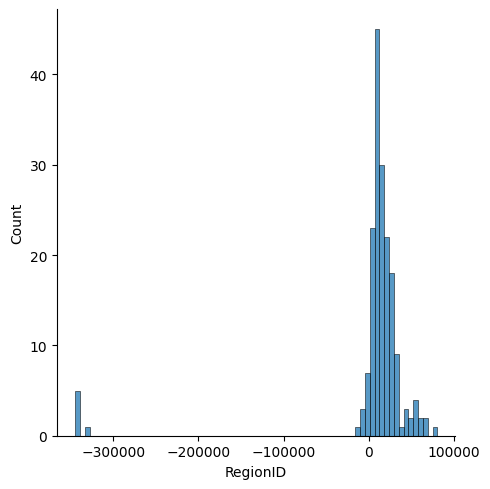

In [ ]:
import seaborn as sns
sns.displot(reg_pred-y_test)

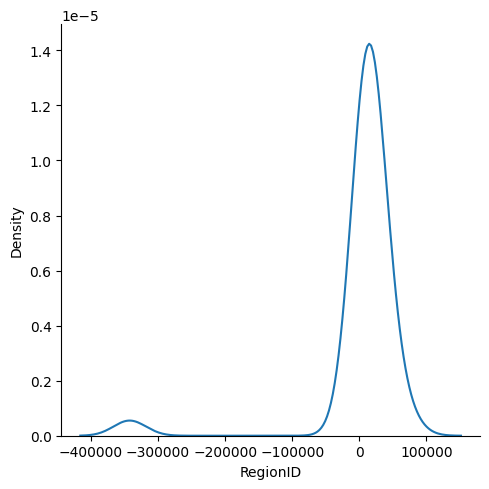

In [ ]:
sns.displot(reg_pred-y_test,kind='kde')
#its good and show the less variance  and dataset is good

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(reg_pred,y_test)

In [ ]:
score

-19.282912090303114